In [1]:
import matplotlib.pyplot as plt

In [2]:
import csv
from csv import reader, writer

def transpose_csv(file_name):
    with open(file_name + '.csv') as f, open(file_name + '_t.csv', 'w') as fw:
        writer(fw, delimiter=',').writerows(zip(*reader(f, delimiter=',')))

    with open(file_name + '_t.csv', newline='') as f:
        spamreader = reader(f, delimiter=',',)
        for row in spamreader:
            print(', '.join(row))

In [5]:
# first, save the output of export_pgf as csv file, then run the following
transpose_csv("bch")

snr, 1.000, 2.000, 3.000, 4.000, 5.000, 6.000, 7.000, 8.000, 9.000, 10.000

 	uncoded, 	9.418500E-02, 	7.144500E-02, 	5.046000E-02, 	3.385500E-02, 	2.160000E-02, 	1.250000E-02, 	6.715000E-03, 	3.085000E-03, 	1.281667E-03, 	3.914286E-04

 	bp-20, 	1.287619E-01, 	1.054921E-01, 	7.773016E-02, 	5.254762E-02, 	2.800000E-02, 	1.157937E-02, 	3.557143E-03, 	8.704906E-04, 	1.383577E-04, 	1.713134E-05

 	gnn-2, 	1.331508E-01, 	1.058016E-01, 	7.983333E-02, 	5.589683E-02, 	3.485714E-02, 	1.746032E-02, 	6.615079E-03, 	1.849206E-03, 	4.216931E-04, 	9.259259E-05

 	gnn-10, 	1.320794E-01, 	1.057143E-01, 	7.796825E-02, 	4.931746E-02, 	2.538095E-02, 	9.539683E-03, 	2.113757E-03, 	3.406820E-04, 	4.865650E-05, 	6.080389E-06

 	, 	, 	, 	, 	, 	, 	, 	, 	, 	, 	



## Burst

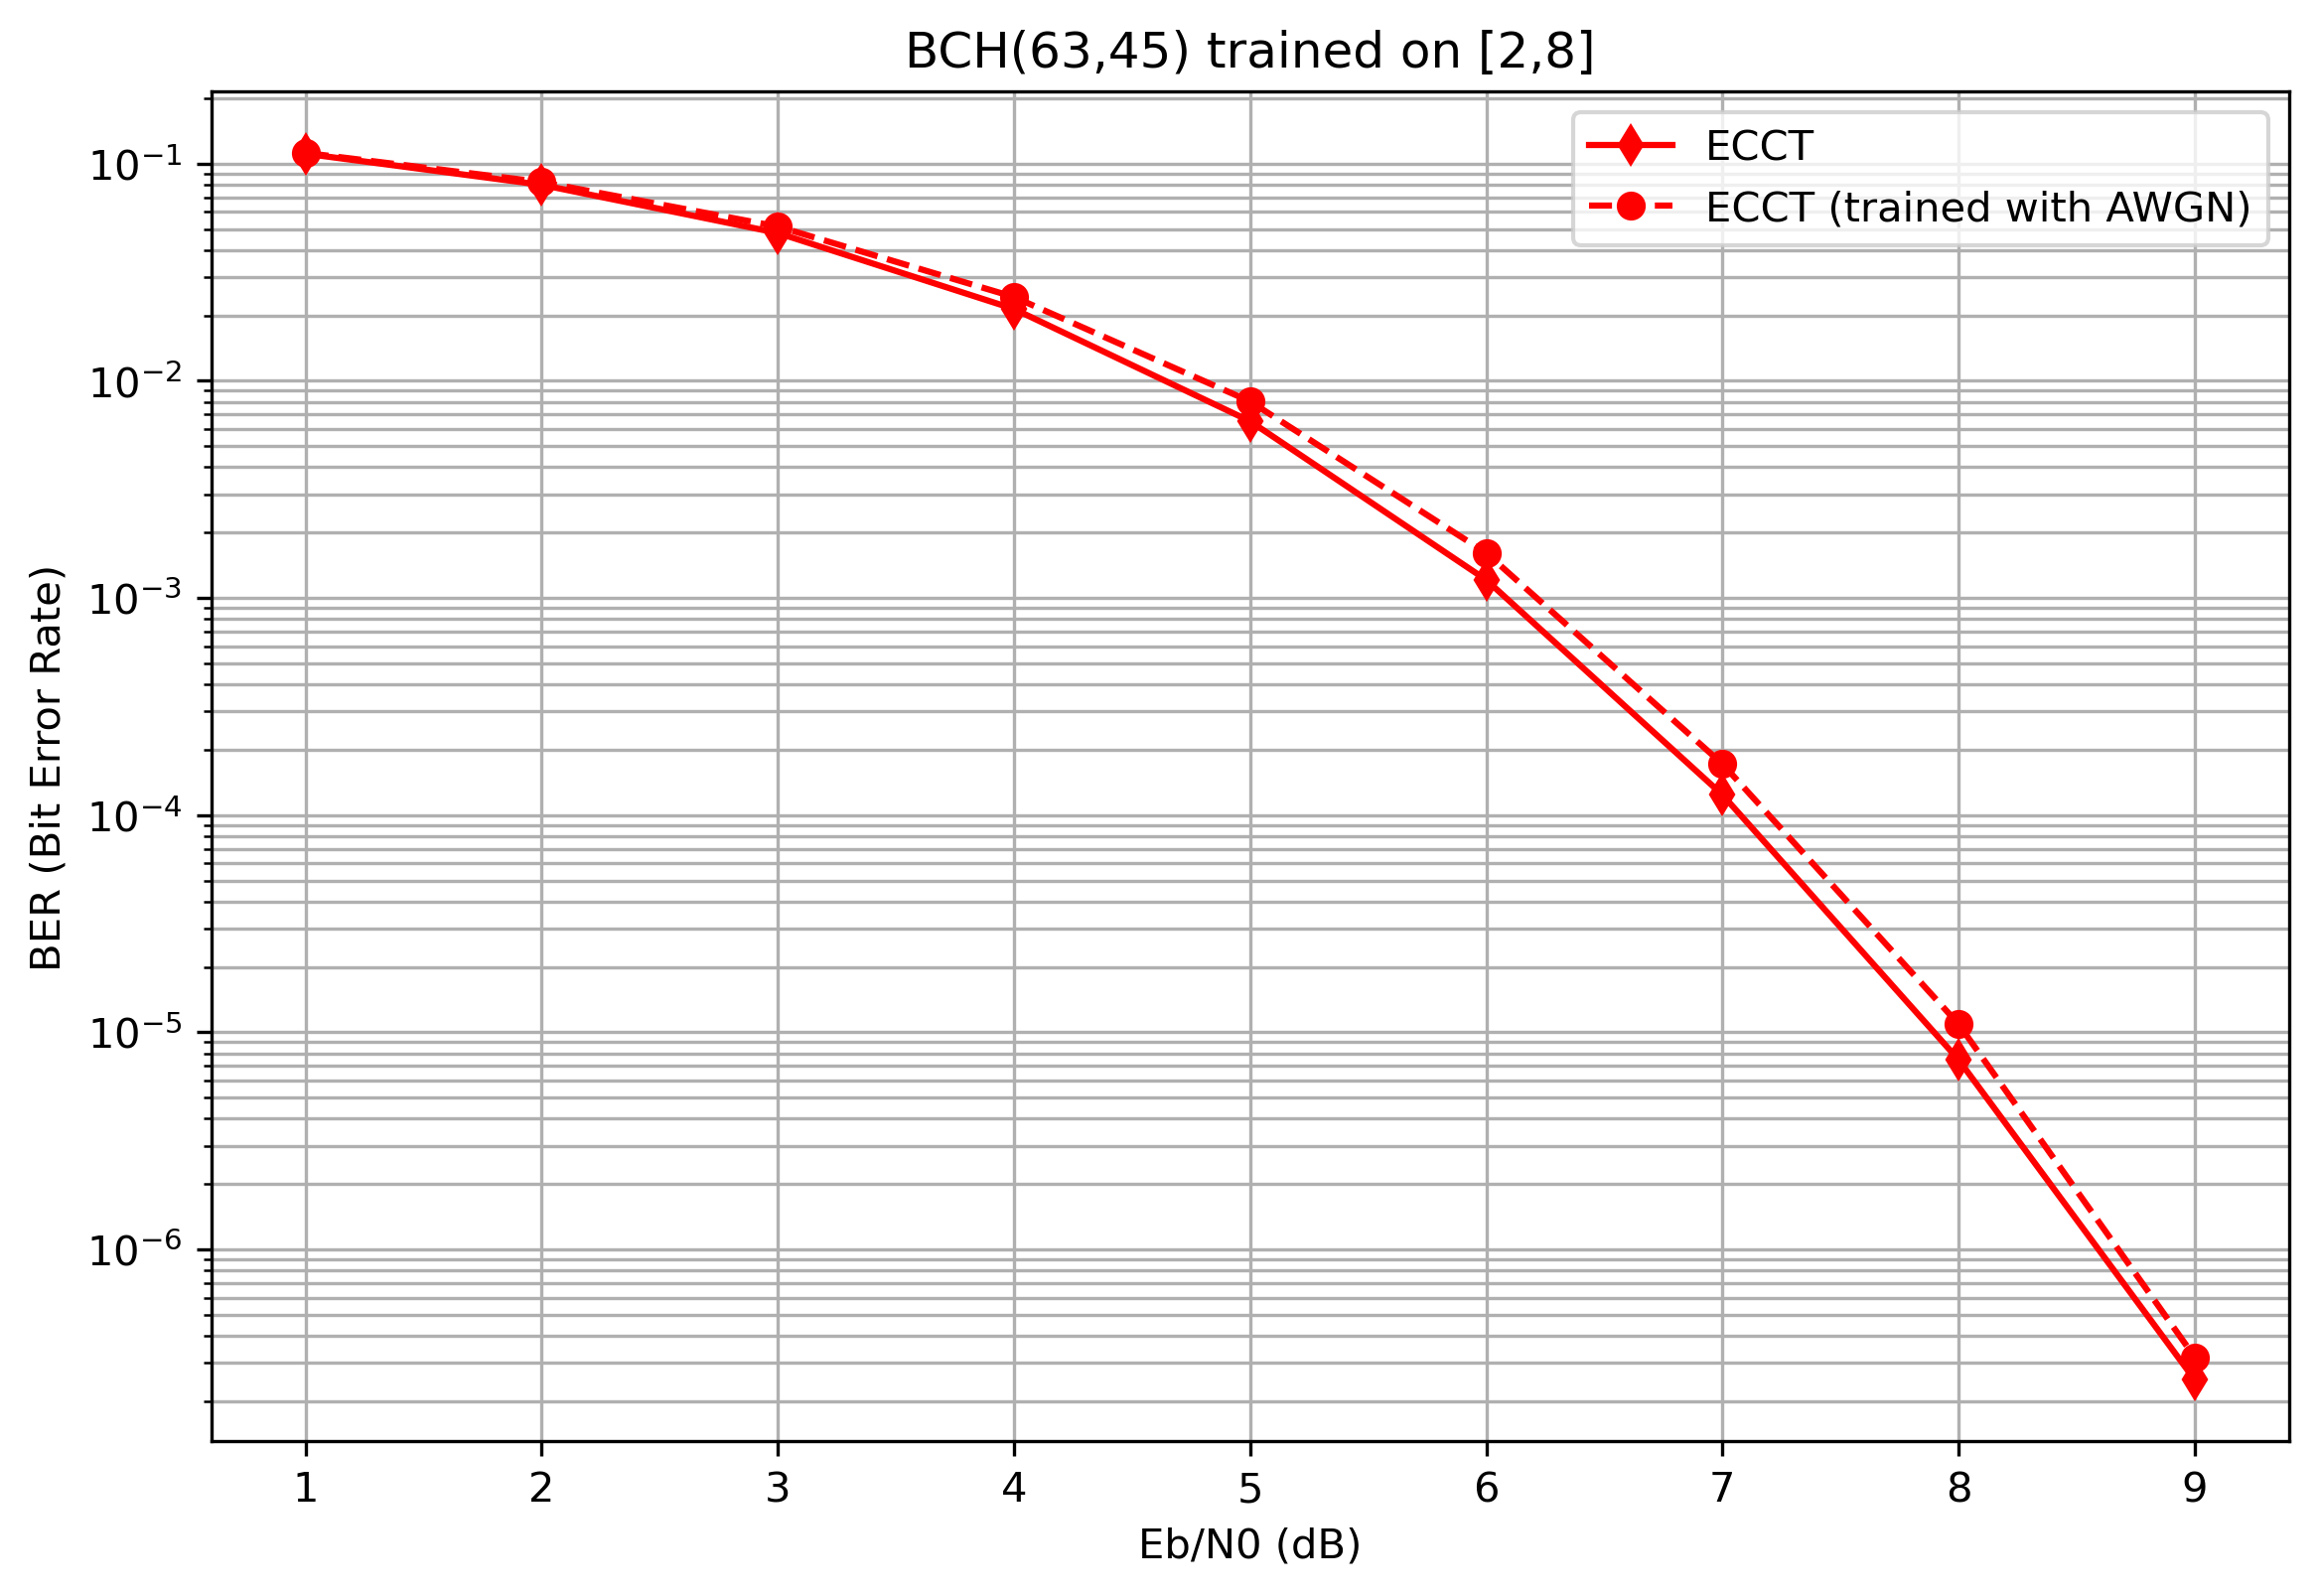

In [8]:
ebno_bch = [1.000, 2.000, 3.000, 4.000, 5.000, 6.000, 7.000, 8.000, 9.000]
ecct = [1.11e-01, 7.98e-02, 4.79e-02, 2.14e-02, 6.51e-03, 1.21e-03, 1.24e-04, 7.47e-06, 2.51e-07]
ecct_awgn_burst = [1.12e-01, 8.22e-02, 5.13e-02, 2.43e-02, 8.03e-03, 1.61e-03, 1.72e-04, 1.09e-05, 3.19e-07]

# create the figure and axes objects
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)
plt.grid(True, which="both", ls="-")

ax.plot(ebno_bch, ecct, "rd-", label='ECCT')
ax.plot(ebno_bch, ecct_awgn_burst, "ro--", label='ECCT (trained with AWGN)')


# set the axis labels and title
ax.set_xlabel('Eb/N0 (dB)')
ax.set_ylabel('BER (Bit Error Rate)')
# ax.set_title('Bit Error Rate vs. SNR')

# set the y-axis scale to logarithmic
ax.set_yscale('log')

# add a legend
ax.legend()

plt.title("BCH(63,45) trained on [2,8]")
# display the plot
plt.show()
fig.savefig("bch-burst.png")

## Bursty

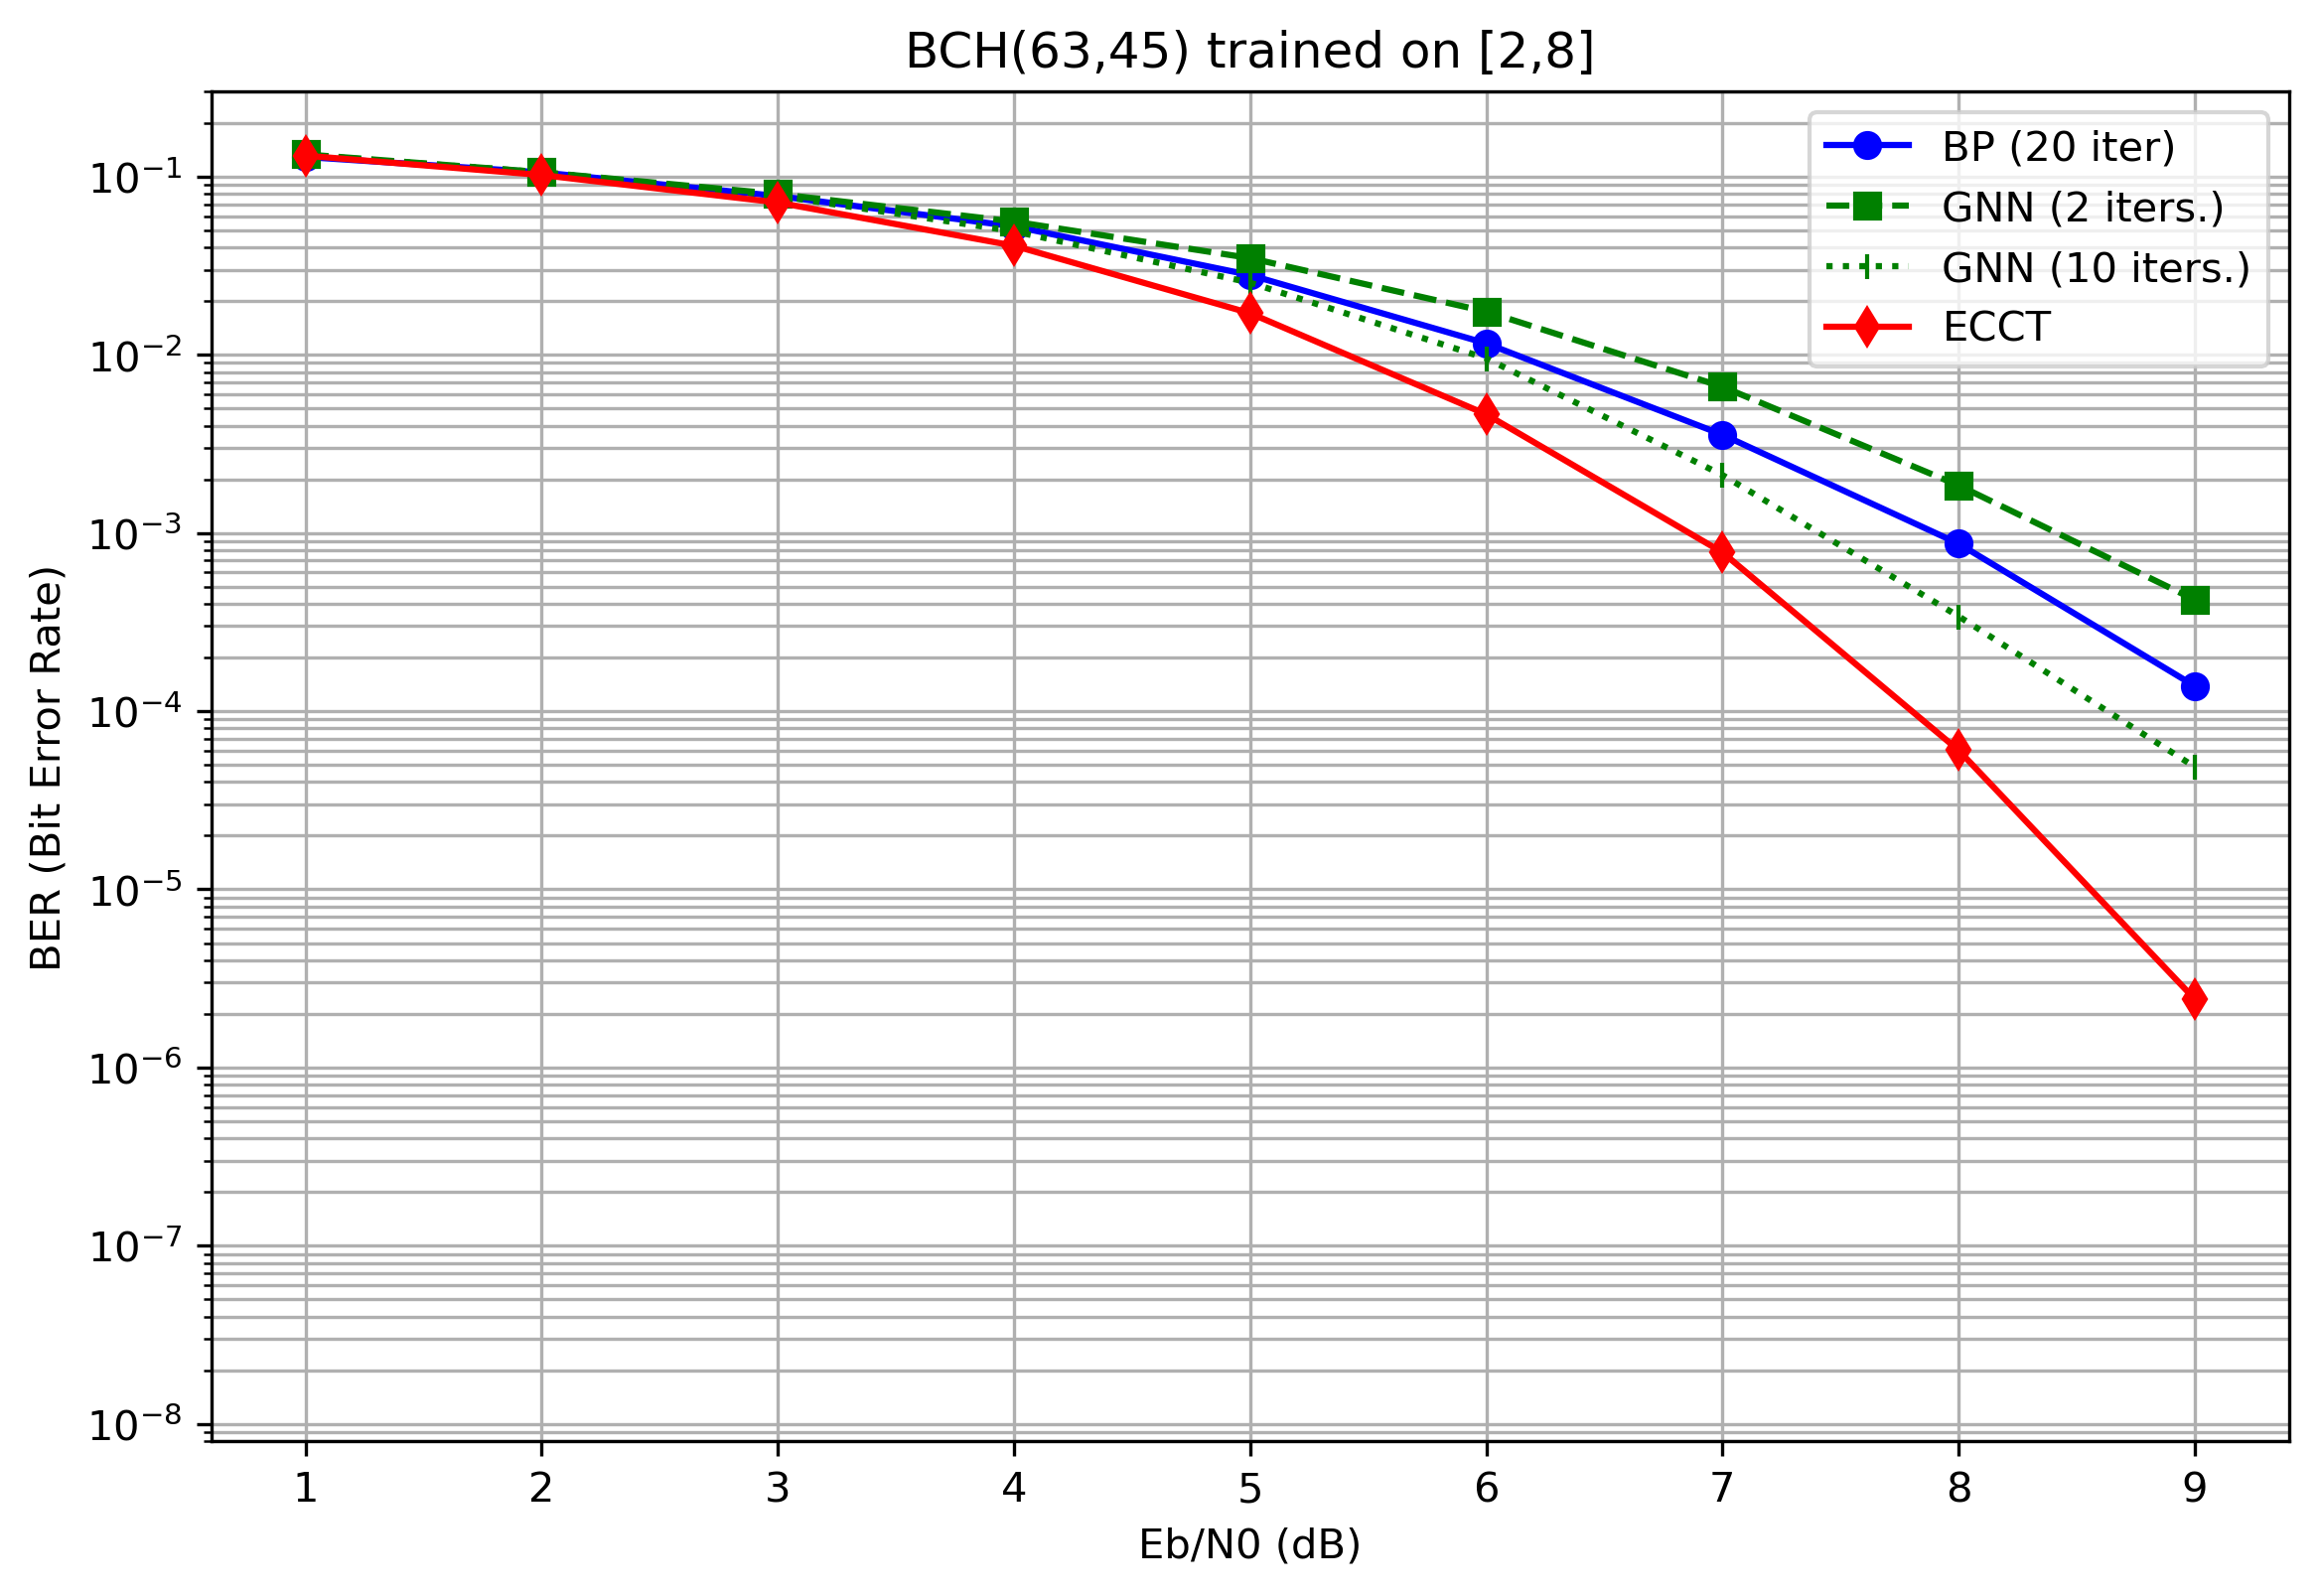

In [7]:
ebno_bch = [1.000, 2.000, 3.000, 4.000, 5.000, 6.000, 7.000, 8.000, 9.000]
bp_20 =	[1.287619E-01, 	1.054921E-01, 	7.773016E-02, 	5.254762E-02, 	2.800000E-02, 	1.157937E-02, 	3.557143E-03, 	8.704906E-04, 	1.383577E-04]

# train with AWGN, test with Bursty
ebno_bch_ecct_awgn_bursty = [2.000, 3.000, 4.000, 5.000, 6.000, 7.000]
ecct_awgn_bursty = [1.03e-01, 7.25e-02, 4.18e-02, 1.77e-02, 4.70e-03, 7.21e-04]

# train and test with AWGN
ecct_original = [4.93e-02, 2.06e-02, 5.02e-03, 6.51e-04, 3.85e-05, 5.77e-07]

# train and test with Bursty
gnn_2 = [1.331508E-01, 	1.058016E-01, 	7.983333E-02, 	5.589683E-02, 	3.485714E-02, 	1.746032E-02, 	6.615079E-03, 	1.849206E-03, 	4.216931E-04]
gnn_10 = [1.320794E-01, 	1.057143E-01, 	7.796825E-02, 	4.931746E-02, 	2.538095E-02, 	9.539683E-03, 	2.113757E-03, 	3.406820E-04, 	4.865650E-05]
ecct = [1.31e-01, 1.02e-01, 7.15e-02, 4.09e-02, 1.71e-02, 4.63e-03, 7.78e-04, 6.03e-05, 2.42e-06]


# create the figure and axes objects
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)
plt.grid(True, which="both", ls="-")

ax.plot(ebno_bch, bp_20, "bo-", label='BP (20 iter)')
ax.plot(ebno_bch, gnn_2, "gs--", label='GNN (2 iters.)')
ax.plot(ebno_bch, gnn_10, "g|:", label='GNN (10 iters.)')
ax.plot(ebno_bch, ecct, "rd-", label='ECCT')

# ax.plot(ebno_bch_ecct_awgn_bursty, ecct[1:-2], "rd-", label='ECCT')
# ax.plot(ebno_bch_ecct_awgn_bursty, ecct_original, "gs--", label='ECCT (original)')
# ax.plot(ebno_bch_ecct_awgn_bursty, ecct_awgn_bursty, "ro--", label='ECCT (trained with AWGN)')


# set the axis labels and title
ax.set_xlabel('Eb/N0 (dB)')
ax.set_ylabel('BER (Bit Error Rate)')
# ax.set_title('Bit Error Rate vs. SNR')

# set the y-axis scale to logarithmic
ax.set_yscale('log')
plt.ylim([8e-9, 3e-1])

# add a legend
ax.legend()

plt.title("BCH(63,45) trained on [2,8]")
# display the plot
plt.show()
# fig.savefig("bch-bursty.png")

## OOD

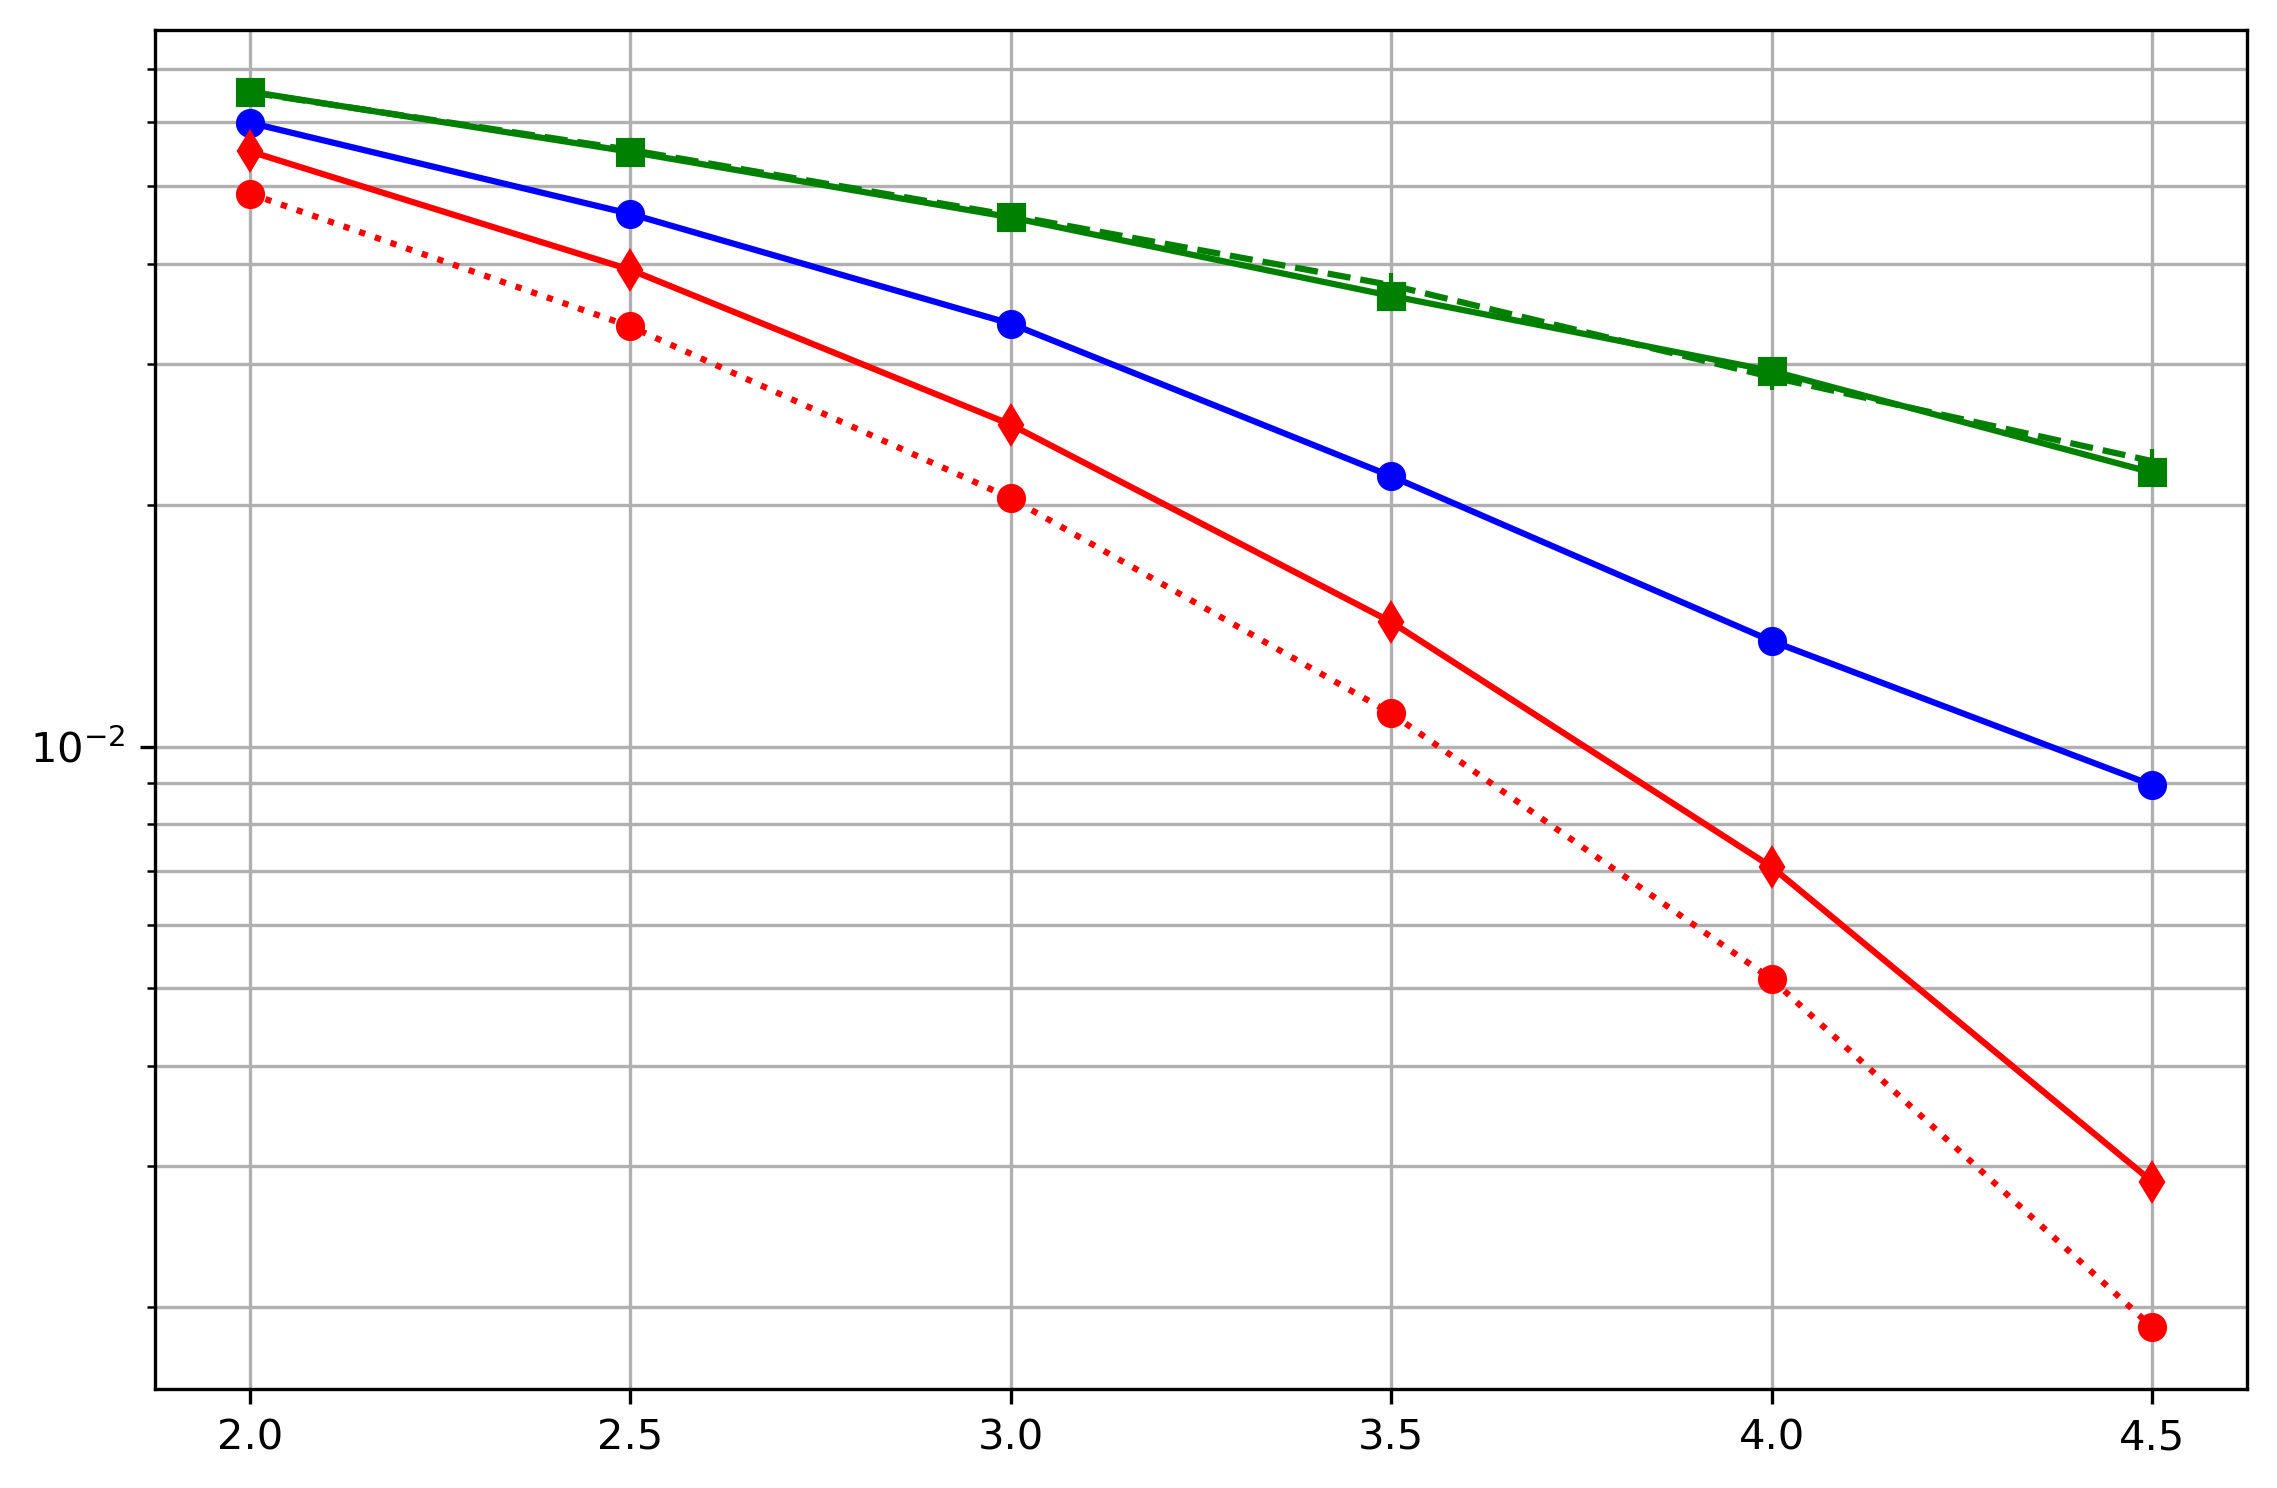

In [23]:
# OOD
ebno_bch = [2., 2.5, 3., 3.5, 4., 4.5]
bp_20 = [ 5.992857E-02, 	4.613492E-02, 	3.366667E-02, 	2.173016E-02, 	1.353968E-02, 	8.956349E-03]
gnn_2 =	[6.613492E-02, 	5.583333E-02, 	4.646825E-02, 	3.642063E-02, 	2.873810E-02, 	2.325397E-02]
gnn_10 = [6.538095E-02, 	5.638095E-02, 	4.610317E-02, 	3.656349E-02, 	2.892063E-02, 	2.195238E-02]
gnn_2_ood = [6.552381E-02,   5.513492E-02,   4.567460E-02,   3.646032E-02,   2.939683E-02,   2.196032E-02]
gnn_3_ood = [6.642857E-02,   5.552381E-02,   4.550794E-02,   3.657143E-02,   2.891270E-02,   2.279365E-02]
gnn_4_ood = [6.656349E-02,   5.434921E-02,   4.515873E-02,   3.640476E-02,   2.942857E-02,   2.228571E-02]
gnn_6_ood = [6.682540E-02,   5.542063E-02,   4.530952E-02,   3.739683E-02,   2.825397E-02,   2.288889E-02]
gnn_8_ood = [6.566667E-02,   5.511111E-02,   4.627778E-02,   3.685714E-02,   2.800794E-02,   2.253968E-02]
gnn_10_ood = [6.539683E-02,   5.542857E-02,   4.592857E-02,   3.759524E-02,   2.888095E-02,   2.269048E-02]

ecct = [4.89e-02, 3.34e-02, 2.04e-02, 1.10e-02, 5.13e-03, 1.89e-03]
ecct_ood = [5.52e-02, 3.93e-02, 2.52e-02, 1.43e-02, 7.08e-03, 2.87e-03]

fig, ax = plt.subplots(figsize=(9, 6), dpi=300)
plt.grid(True, which="both", ls="-")

ax.plot(ebno_bch, bp_20, "bo-", label='BP (20 iter)')
ax.plot(ebno_bch, ecct, "ro:", label='ECCT (in-distribution)')
ax.plot(ebno_bch, ecct_ood, "rd-", label='ECCT (OOD)')
ax.plot(ebno_bch, gnn_2_ood, "gs-", label='GNN (2 iters., OOD)')
ax.plot(ebno_bch, gnn_10_ood, "g|--", label='GNN (10 iters., OOD)')

ax.set_yscale('log')

plt.show()

## Original

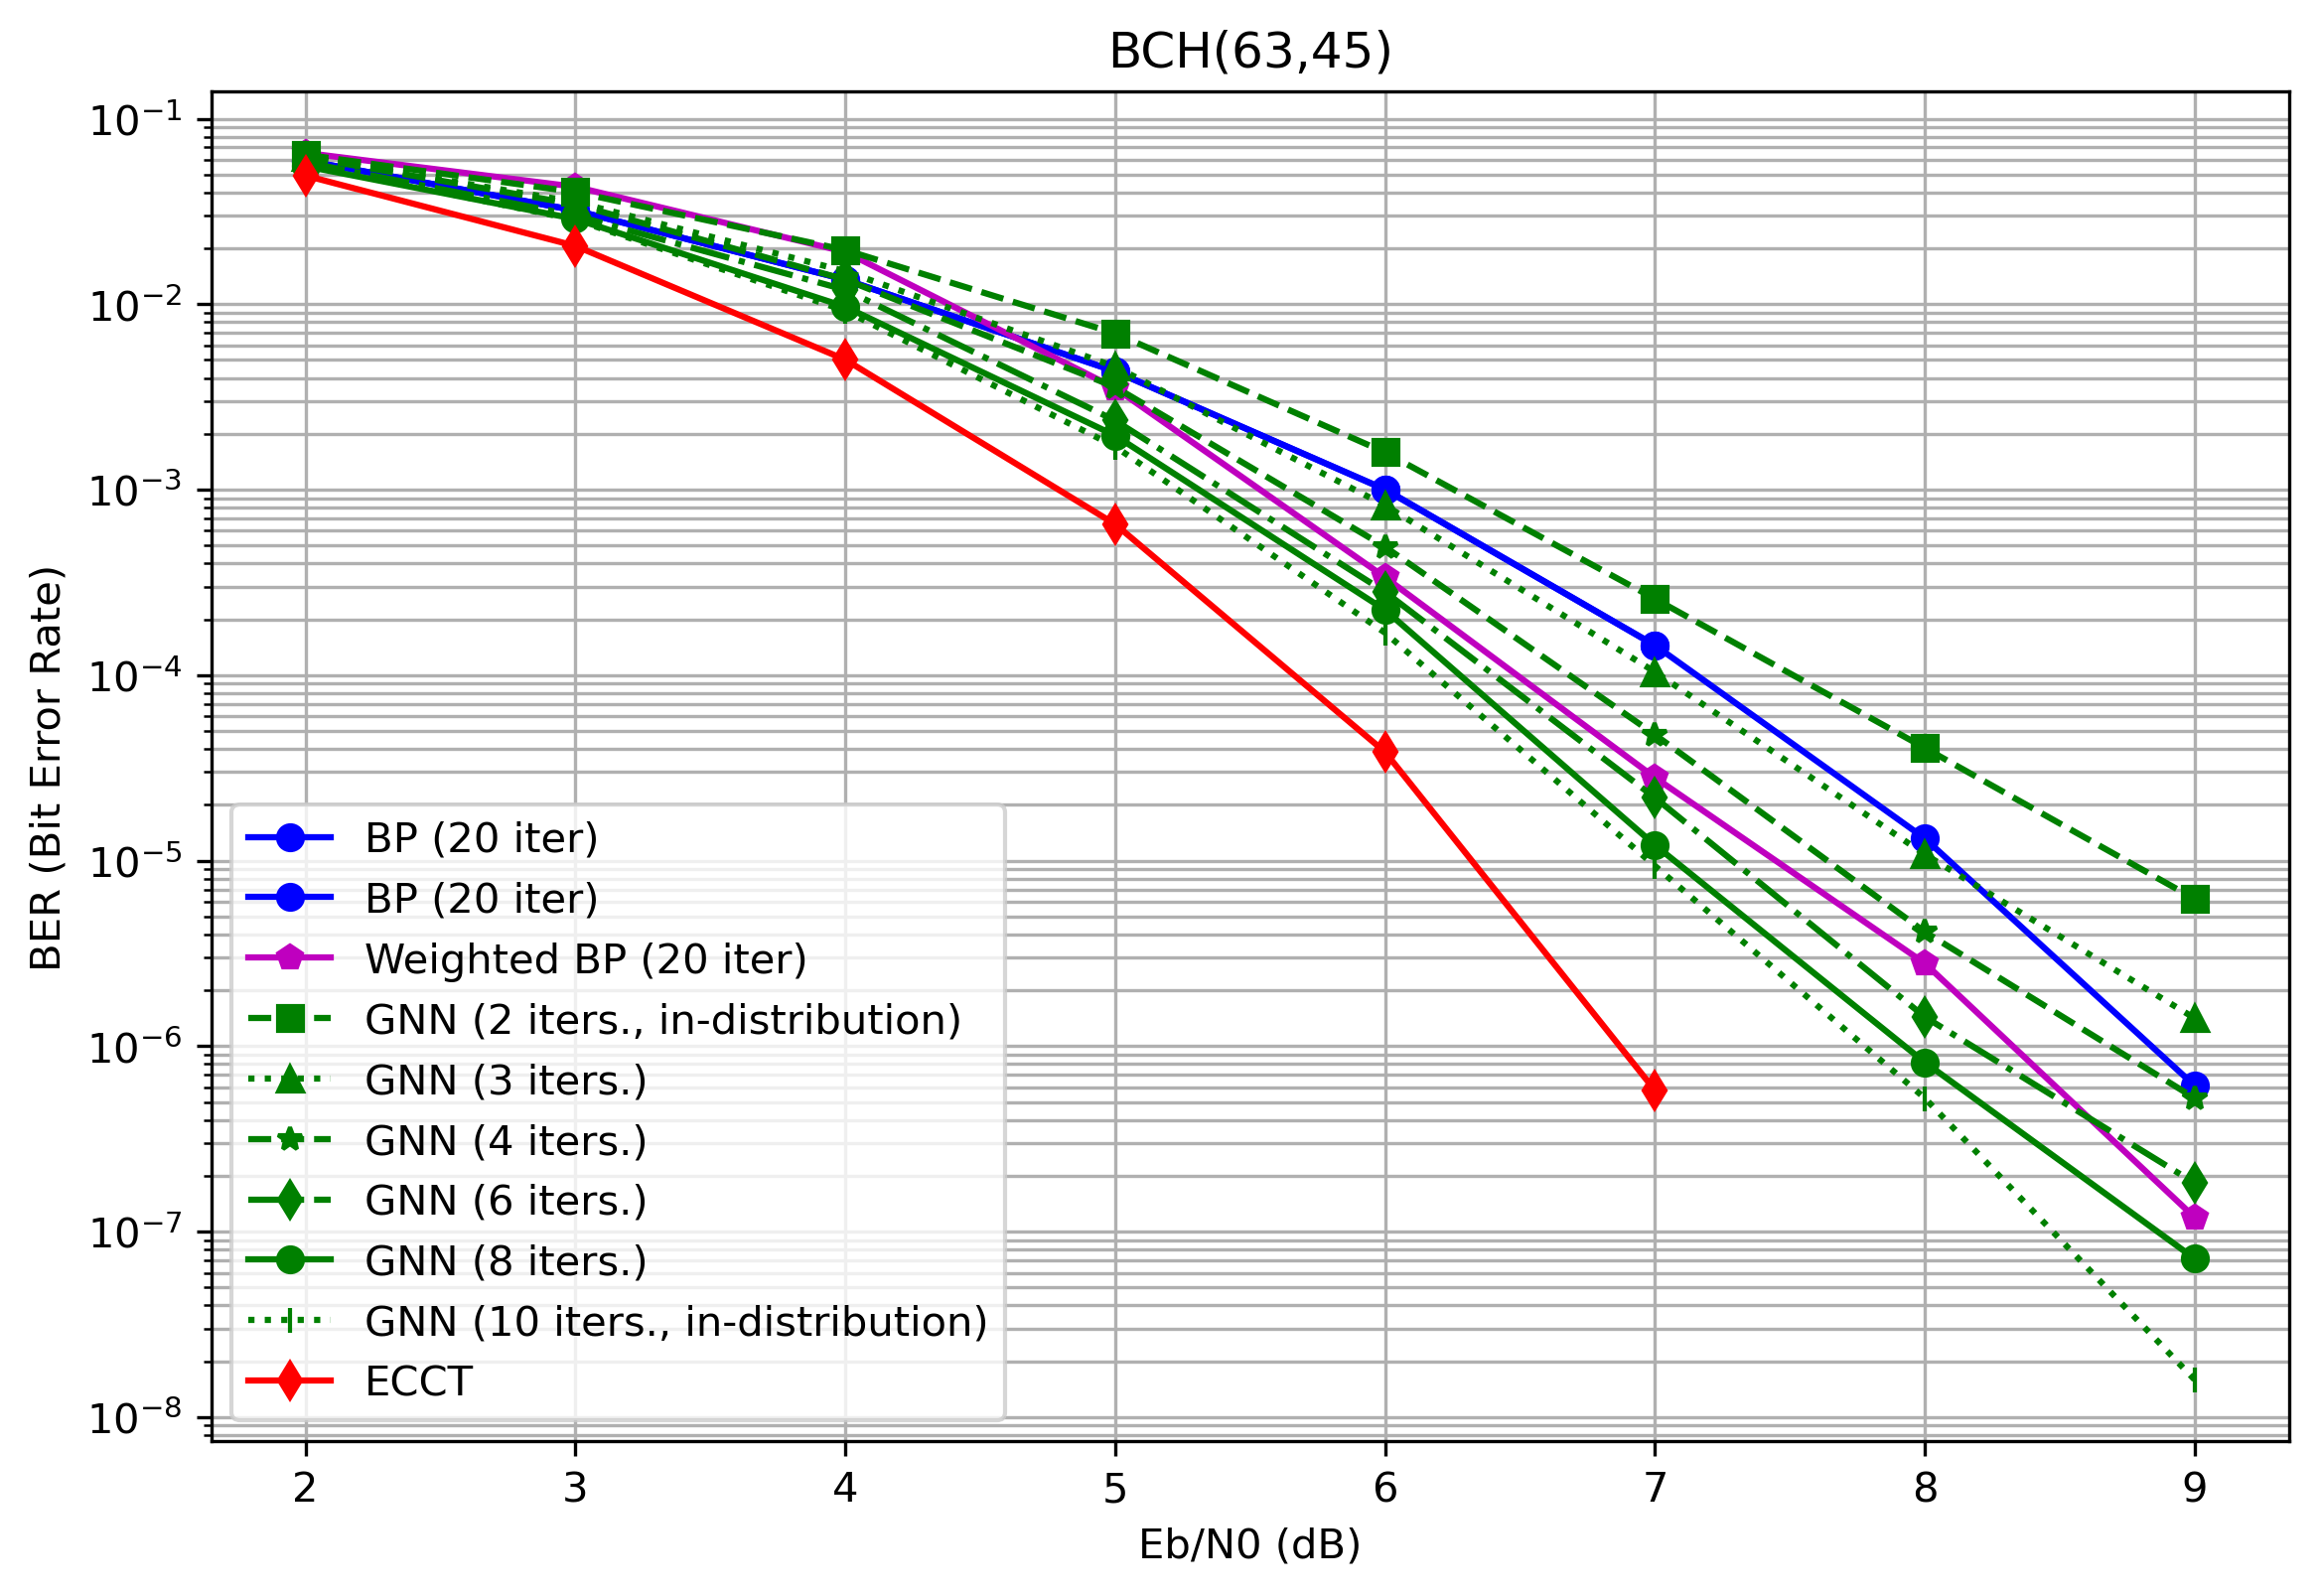

In [21]:
ebno_bch = [2.000, 3.000, 4.000, 5.000, 6.000, 7.000, 8.000, 9.000]
uncoded = [3.774000E-02, 2.220500E-02, 1.242000E-02, 6.140000E-03, 2.385000E-03, 7.375000E-04, 1.914286E-04, 3.520833E-05]
bp_20 = [5.946032E-02, 3.200794E-02, 1.355159E-02, 4.339286E-03, 1.002268E-03, 1.446932E-04, 1.316667E-05, 6.111111E-07]
wbp_20 = [6.540476E-02, 4.294444E-02, 1.912698E-02, 3.526455E-03, 3.367725E-04, 2.802994E-05, 2.793651E-06, 1.190476E-07]
gnn_2 = [6.397619E-02, 4.020635E-02, 1.958730E-02, 6.964286E-03, 1.588889E-03, 2.577640E-04, 4.048859E-05, 6.211180E-06]
gnn_3 = [6.246032E-02, 3.556349E-02, 1.505556E-02, 4.603175E-03, 8.227513E-04, 1.040707E-04, 1.080683E-05, 1.412698E-06]
gnn_4 = [6.226190E-02, 3.450000E-02, 1.357143E-02, 3.574074E-03, 4.915966E-04, 4.773491E-05, 4.126984E-06, 5.238095E-07]
gnn_6 = [5.815873E-02, 3.000000E-02, 1.194444E-02, 2.358730E-03, 2.807540E-04, 2.183102E-05, 1.436508E-06, 1.825397E-07]
gnn_8 = [5.541270E-02, 2.879365E-02, 9.682540E-03, 1.956349E-03, 2.245150E-04, 1.212522E-05, 8.174603E-07, 7.142857E-08]
gnn_10 = [5.683333E-02, 2.851587E-02, 9.214286E-03, 1.707483E-03, 1.691387E-04, 9.362885E-06, 5.238095E-07, 1.587302E-08]
ebno_bch_ecct = [2.000, 3.000, 4.000, 5.000, 6.000, 7.000]
ecct = [4.93e-02, 2.06e-02, 5.02e-03, 6.51e-04, 3.85e-05, 5.77e-07]


# create the figure and axes objects
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)
plt.grid(True, which="both", ls="-")

# plot the lines
ax.plot(ebno_bch, bp_20, "bo-", label='BP (20 iter)')
ax.plot(ebno_bch_ecct, bp_20[:-2], "bo-", label='BP (20 iter)')
ax.plot(ebno_bch, wbp_20, "mp-", label='Weighted BP (20 iter)')
ax.plot(ebno_bch, gnn_2, "gs--", label='GNN (2 iters., in-distribution)')
ax.plot(ebno_bch, gnn_3, "g^:", label='GNN (3 iters.)')
ax.plot(ebno_bch, gnn_4, "g*--", label='GNN (4 iters.)')
ax.plot(ebno_bch, gnn_6, "gd-.", label='GNN (6 iters.)')
ax.plot(ebno_bch, gnn_8, "go-", label='GNN (8 iters.)')
ax.plot(ebno_bch, gnn_10, "g|:", label='GNN (10 iters., in-distribution)')
ax.plot(ebno_bch_ecct, ecct, "rd-", label='ECCT')


# set the axis labels and title
ax.set_xlabel('Eb/N0 (dB)')
ax.set_ylabel('BER (Bit Error Rate)')
# ax.set_title('Bit Error Rate vs. SNR')

# set the y-axis scale to logarithmic
ax.set_yscale('log')

# add a legend
ax.legend()

plt.title("BCH(63,45)")
# display the plot
plt.show()
# fig.savefig("fig3.png")

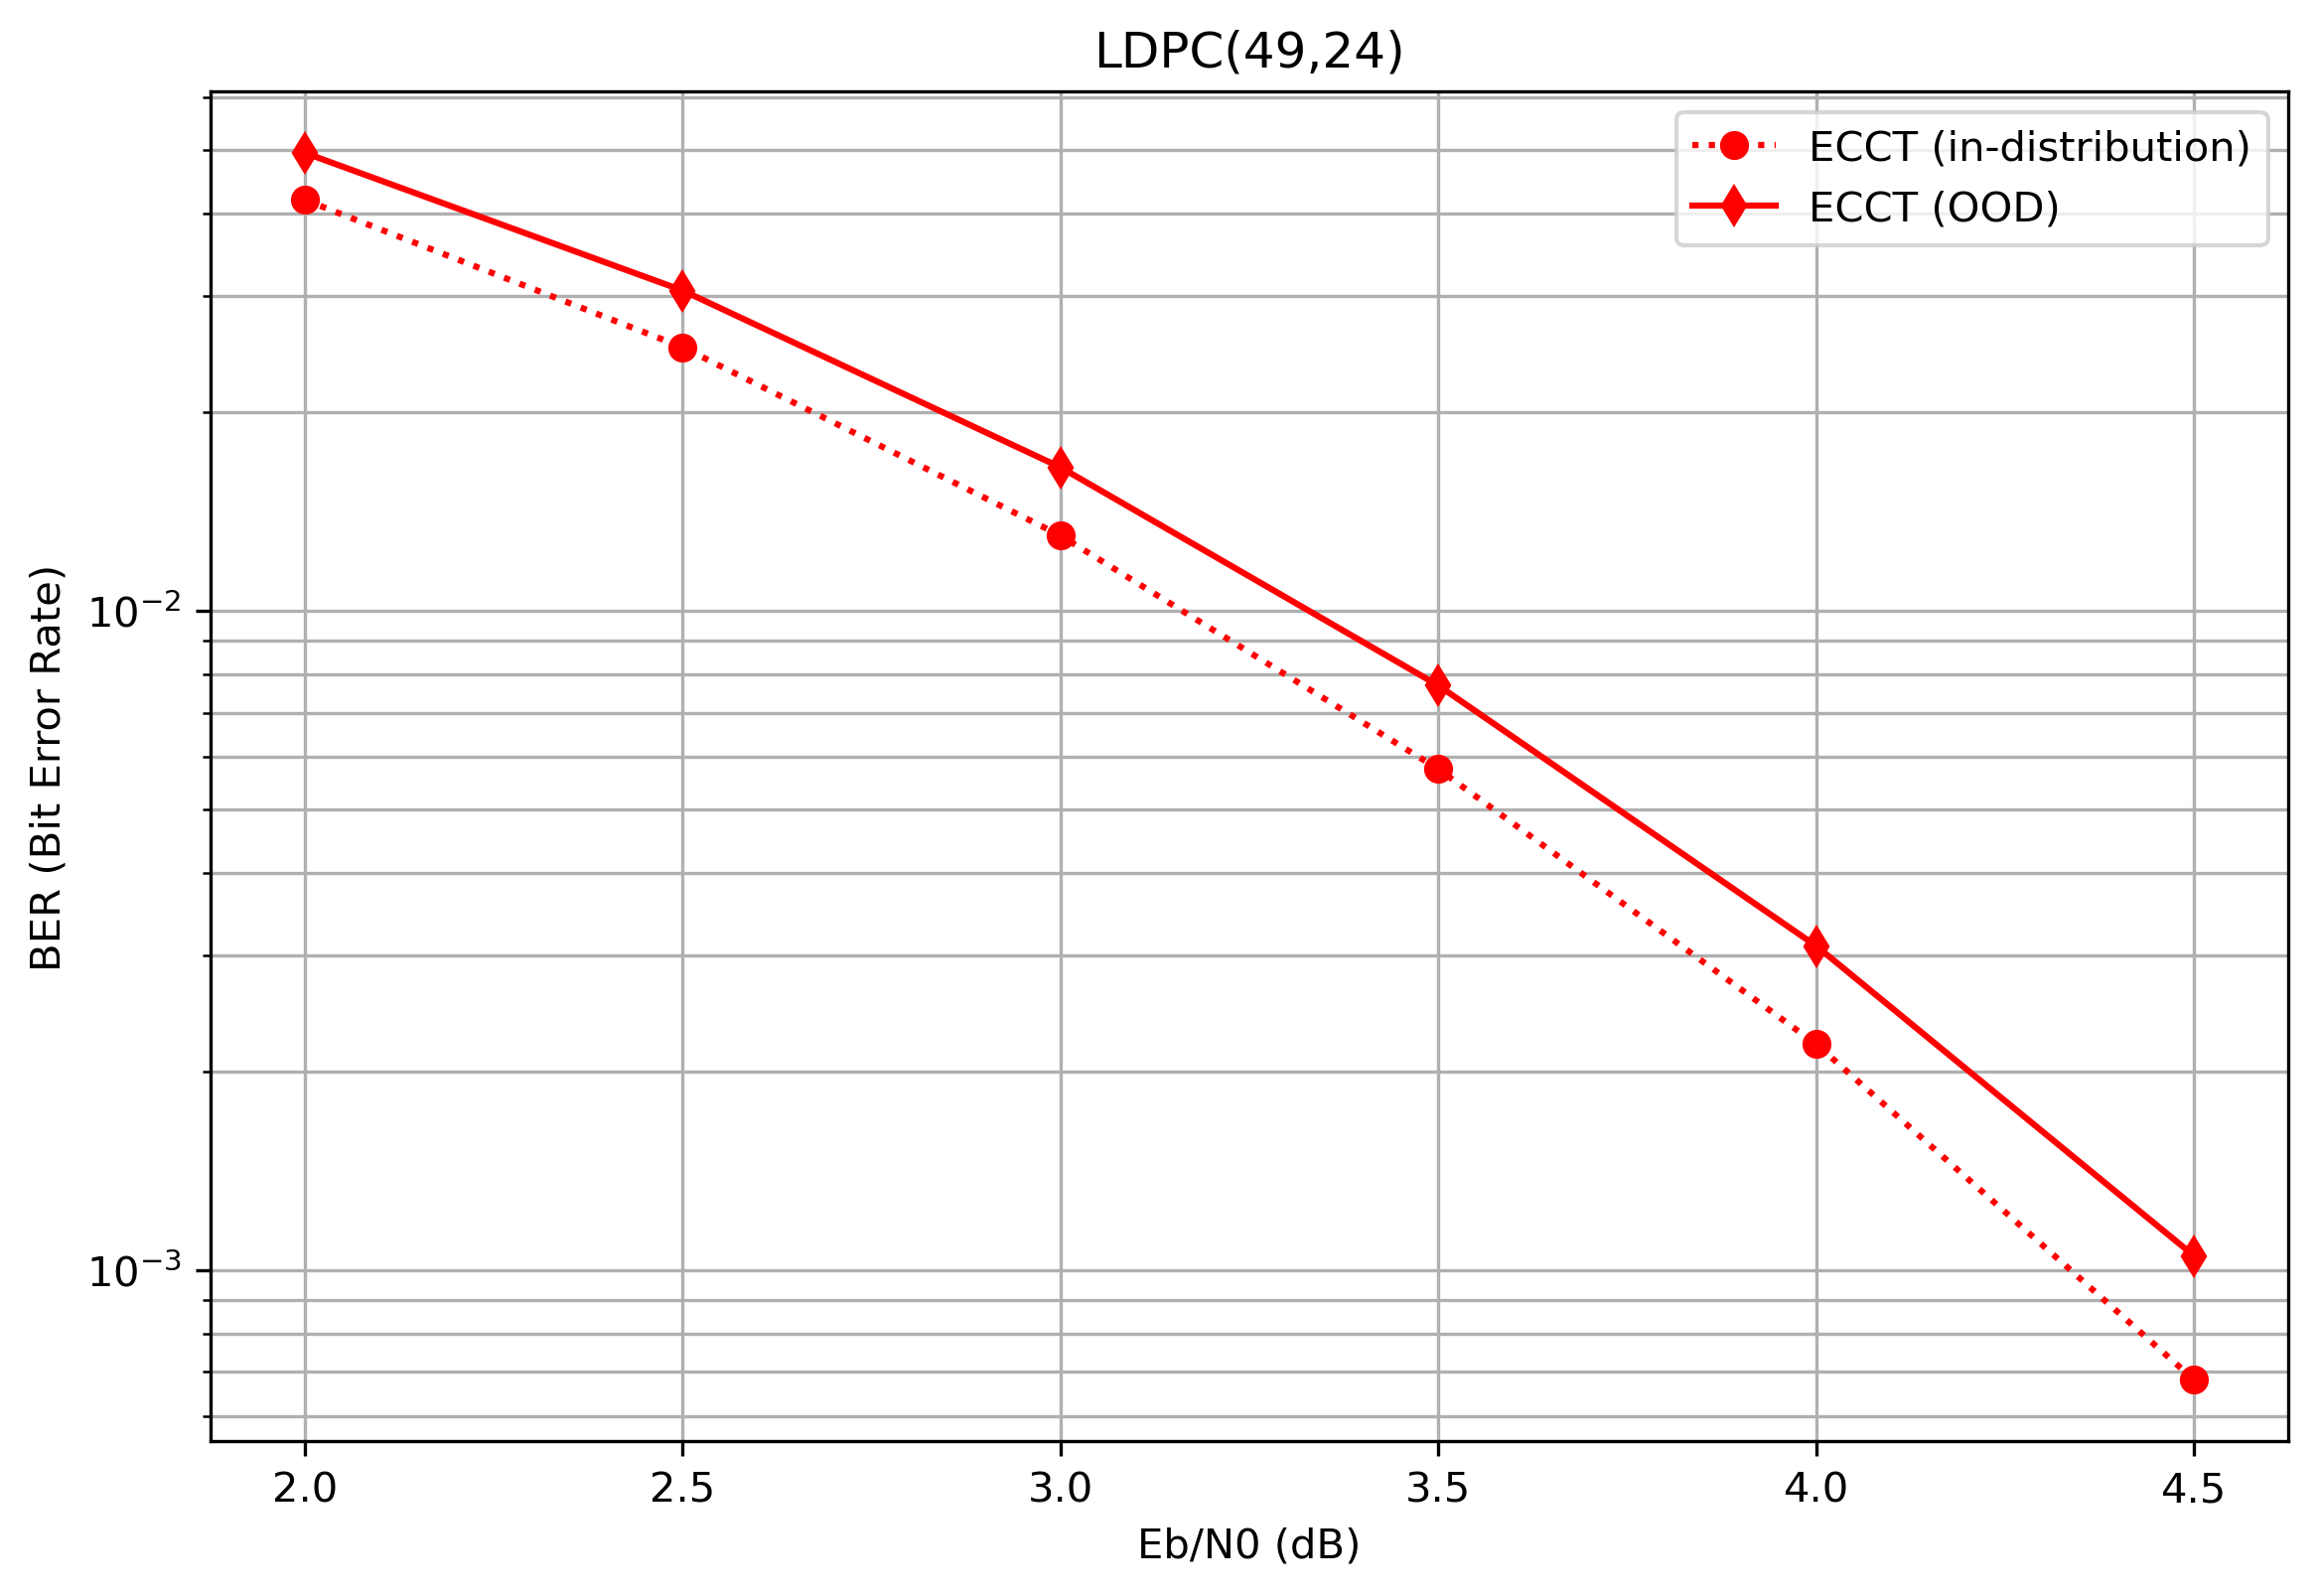

In [15]:
# LDPC OOD
ebno_ldpc = [2., 2.5, 3., 3.5, 4., 4.5]
ecct = [4.20e-02, 2.51e-02, 1.30e-02, 5.75e-03, 2.20e-03, 6.81e-04]
ecct_ood = [4.95e-02, 3.06e-02, 1.65e-02, 7.70e-03, 3.10e-03, 1.05e-03]

# create the figure and axes objects
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)
plt.grid(True, which="both", ls="-")

# plot the lines
ax.plot(ebno_ldpc, ecct, "ro:", label='ECCT (in-distribution)')
ax.plot(ebno_ldpc, ecct_ood, "rd-", label='ECCT (OOD)')


# set the axis labels and title
ax.set_xlabel('Eb/N0 (dB)')
ax.set_ylabel('BER (Bit Error Rate)')
# ax.set_title('Bit Error Rate vs. SNR')

# set the y-axis scale to logarithmic
ax.set_yscale('log')

# add a legend
ax.legend()

plt.title("LDPC(49,24)")

# display the plot
plt.show()
fig.savefig("ldpc-ood.png")

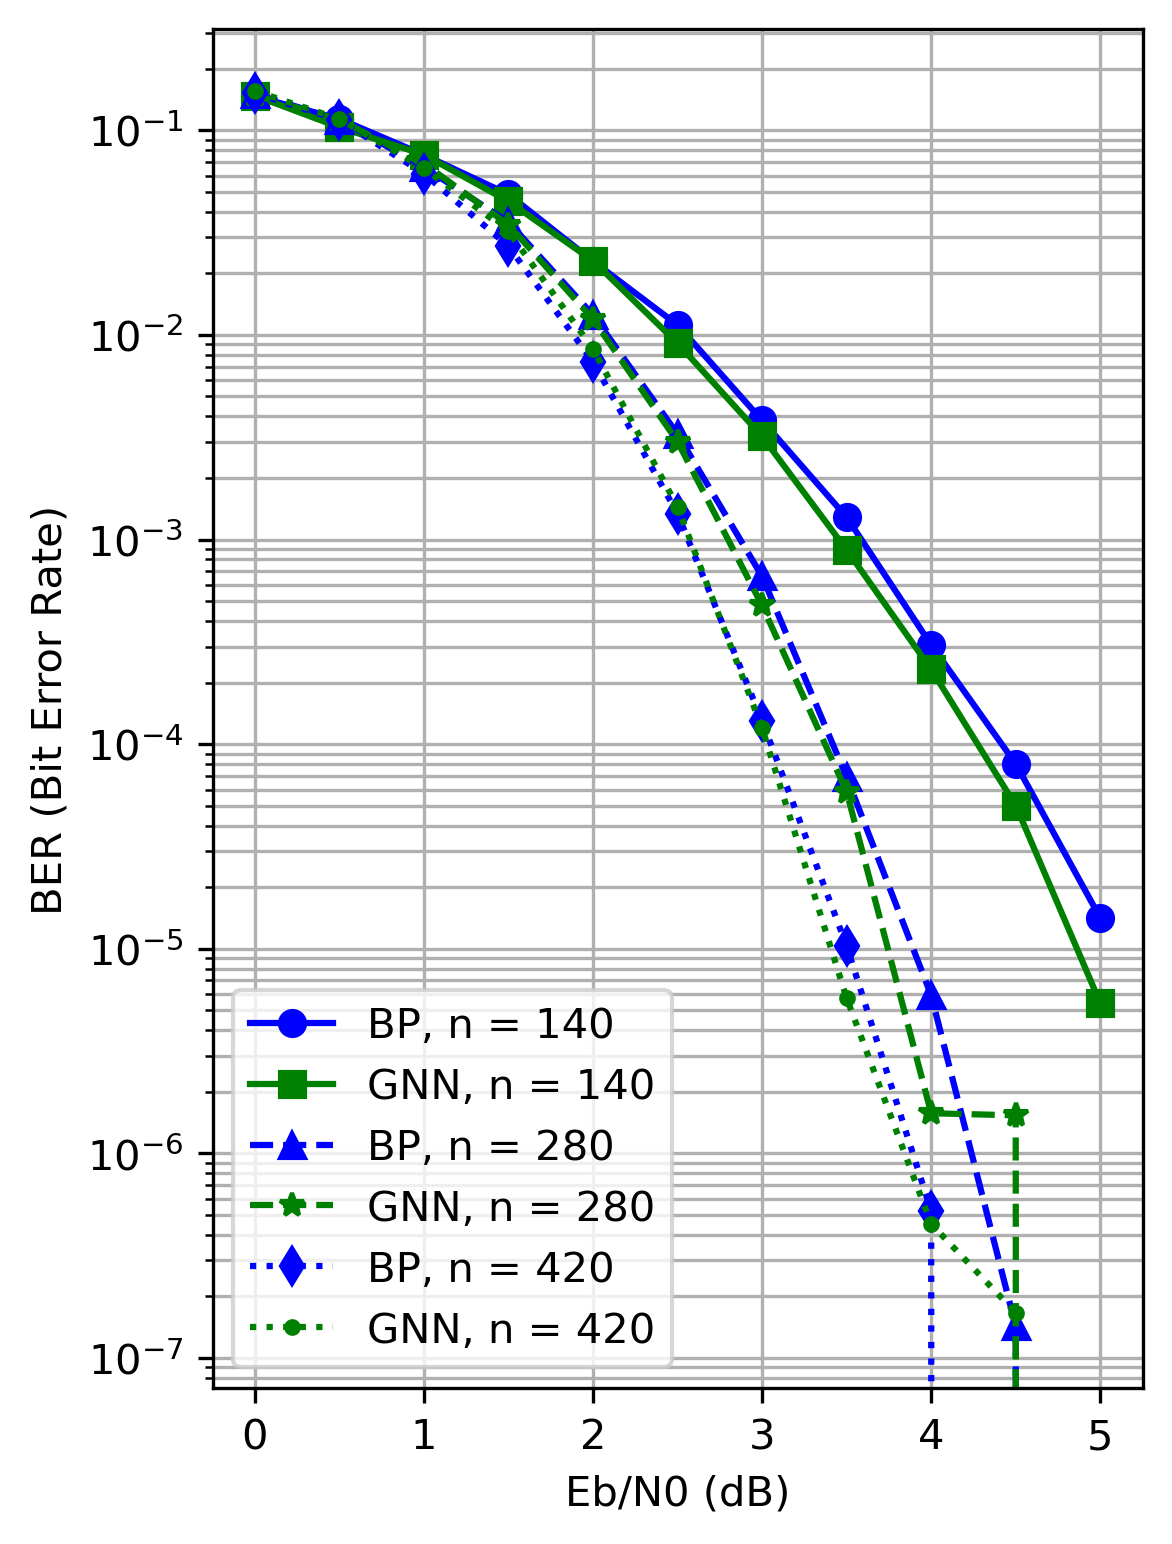

In [16]:
# Data for plotting
ebno_ldpc = [0.000, 0.500, 1.000, 1.500, 2.000, 2.500, 3.000, 3.500, 4.000, 4.500, 5.000]
# uncoded = [7.828000E-02, 	6.871000E-02, 	5.543000E-02, 	4.649000E-02, 	3.745000E-02, 	3.012000E-02, 	2.321000E-02, 	1.704000E-02, 	1.271000E-02, 	8.160000E-03, 	6.260000E-03]
bp_k60_n140 = [1.463000E-01, 	1.136143E-01, 	7.574286E-02, 	4.859286E-02, 	2.291905E-02, 	1.117429E-02, 	3.815934E-03, 	1.284363E-03, 	3.055000E-04, 	8.014286E-05, 	1.414286E-05]
gnn_k60_n140 = [1.475857E-01, 	1.033286E-01, 	7.590714E-02, 	4.492857E-02, 	2.300476E-02, 	9.100000E-03, 	3.188776E-03, 	8.897010E-04, 	2.321429E-04, 	5.014286E-05, 	5.428571E-06]
bp_k120_n280 =	[1.503750E-01, 	1.126179E-01, 	6.605714E-02, 	3.554286E-02, 	1.250476E-02, 	3.271825E-03, 	6.604167E-04, 	6.903571E-05, 	5.928571E-06, 	1.428571E-07, 	0.000000E+00]
gnn_k120_n280 = [1.481893E-01, 	1.126500E-01, 	6.877857E-02, 	3.448750E-02, 	1.192381E-02, 	3.005804E-03, 	4.759653E-04, 	5.853571E-05, 	1.571429E-06, 	1.535714E-06, 	0.000000E+00]
bp_k180_n420 =	[1.518667E-01, 	1.119738E-01, 	6.139286E-02, 	2.709286E-02, 	7.388095E-03, 	1.336429E-03, 	1.303411E-04, 	1.033333E-05, 	5.238095E-07, 	0.000000E+00, 	0.000000E+00]
gnn_k180_n420 =	[1.555524E-01, 	1.134881E-01, 	6.513571E-02, 	3.204286E-02, 	8.544444E-03, 	1.443915E-03, 	1.196901E-04, 	5.738095E-06, 	4.523810E-07, 	1.666667E-07, 	0.000000E+00]

# create the figure and axes objects
fig, ax = plt.subplots(figsize=(4, 6), dpi=300)
plt.grid(True, which="both", ls="-")

# plot the lines
# ax.plot(snr, uncoded, label='Uncoded')
ax.plot(ebno_ldpc, bp_k60_n140, "bo-", label='BP, n = 140')
ax.plot(ebno_ldpc, gnn_k60_n140, "gs-", label='GNN, n = 140')
ax.plot(ebno_ldpc, bp_k120_n280, "b^--", label='BP, n = 280')
ax.plot(ebno_ldpc, gnn_k120_n280, "g*--", label='GNN, n = 280')
ax.plot(ebno_ldpc, bp_k180_n420, "bd:", label='BP, n = 420')
ax.plot(ebno_ldpc, gnn_k180_n420, "g.:", label='GNN, n = 420')


# set the axis labels and title
ax.set_xlabel('Eb/N0 (dB)')
ax.set_ylabel('BER (Bit Error Rate)')
# ax.set_title('Bit Error Rate vs. SNR')

# set the y-axis scale to logarithmic
ax.set_yscale('log')

# add a legend
ax.legend()

# display the plot
plt.show()
fig.savefig("fig5-1.png")

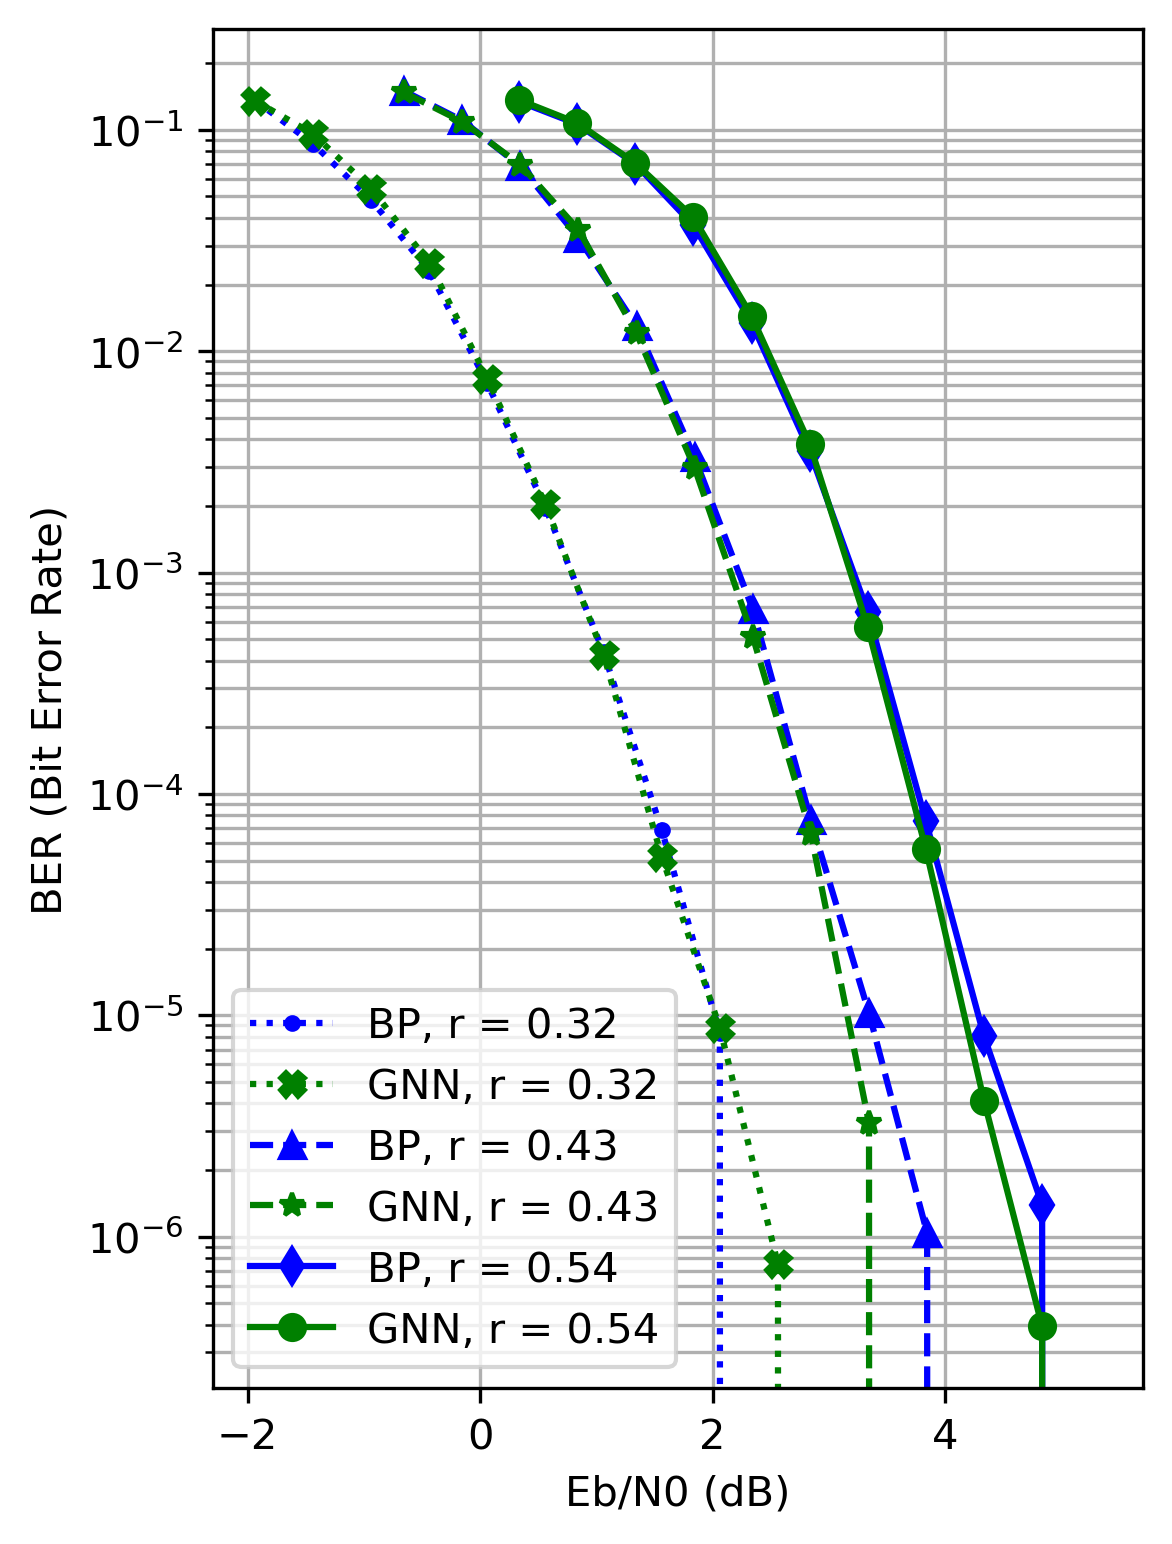

In [3]:
import math
ebno_ldpc = [0.000, 0.500, 1.000, 1.500, 2.000, 2.500, 3.000, 3.500, 4.000, 4.500, 5.000]
esno_5g = [[x + 10 * math.log(2 * r, 10) for x in ebno_ldpc] for r in [0.32, 0.43, 0.54]]
bp_k120_n280 = [1.498786E-01, 	1.103143E-01, 	6.851429E-02, 	3.252679E-02, 	1.297857E-02, 	3.310317E-03, 	6.825510E-04, 	7.589286E-05, 	1.021429E-05, 	1.035714E-06, 	0.000000E+00]
gnn_k120_n280 = [1.475607E-01, 	1.089429E-01, 	6.960714E-02, 	3.541786E-02, 	1.203333E-02, 	2.966518E-03, 	5.133117E-04, 	6.600000E-05, 	3.250000E-06, 	0.000000E+00, 	0.000000E+00]
bp_k90_n280 = [1.360929E-01, 	8.656429E-02, 	4.821071E-02, 	2.304286E-02, 	7.150714E-03, 	1.965934E-03, 	4.354396E-04, 	6.882143E-05, 	8.285714E-06, 	0.000000E+00, 	0.000000E+00]
gnn_k90_n280 = [1.355643E-01, 	9.592857E-02, 	5.431786E-02, 	2.514107E-02, 	7.521429E-03, 	2.030519E-03, 	4.254252E-04, 	5.210714E-05, 	8.785714E-06, 	7.500000E-07, 	0.000000E+00]
bp_k150_n280 = [1.342107E-01, 	1.061893E-01, 	7.020000E-02, 	3.702500E-02, 	1.346429E-02, 	3.533571E-03, 	6.644481E-04, 	7.517857E-05, 	8.035714E-06, 	1.392857E-06, 	0.000000E+00]
gnn_k150_n280 = [1.366286E-01, 	1.075286E-01, 	7.081786E-02, 	4.024286E-02, 	1.444286E-02, 	3.815714E-03, 	5.651786E-04, 	5.617857E-05, 	4.107143E-06, 	3.928571E-07, 	0.000000E+00]

# create the figure and axes objects
fig, ax = plt.subplots(figsize=(4, 6), dpi=300)
plt.grid(True, which="both", ls="-")

# plot the lines
# ax.plot(snr, uncoded, label='Uncoded')
ax.plot(esno_5g[0], bp_k90_n280, "b.:", label='BP, r = 0.32')
ax.plot(esno_5g[0], gnn_k90_n280, "gX:", label='GNN, r = 0.32')
ax.plot(esno_5g[1], bp_k120_n280, "b^--", label='BP, r = 0.43')
ax.plot(esno_5g[1], gnn_k120_n280, "g*--", label='GNN, r = 0.43')
ax.plot(esno_5g[2], bp_k150_n280, "bd-", label='BP, r = 0.54')
ax.plot(esno_5g[2], gnn_k150_n280, "go-", label='GNN, r = 0.54')


# set the axis labels and title
ax.set_xlabel('Eb/N0 (dB)')
ax.set_ylabel('BER (Bit Error Rate)')
# ax.set_title('Bit Error Rate vs. SNR')

# set the y-axis scale to logarithmic
ax.set_yscale('log')

# add a legend
ax.legend()

# display the plot
plt.show()
fig.savefig("fig5-2.png")